In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("drive/MyDrive/project_Data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'drive/MyDrive/project_Data'.
There are 9 directories and 0 images in 'drive/MyDrive/project_Data/test'.
There are 0 directories and 160 images in 'drive/MyDrive/project_Data/test/food'.
There are 0 directories and 132 images in 'drive/MyDrive/project_Data/test/fruits_vegetables'.
There are 0 directories and 54 images in 'drive/MyDrive/project_Data/test/clothes'.
There are 0 directories and 118 images in 'drive/MyDrive/project_Data/test/vehicle'.
There are 0 directories and 96 images in 'drive/MyDrive/project_Data/test/forest'.
There are 0 directories and 102 images in 'drive/MyDrive/project_Data/test/flowers'.
There are 0 directories and 96 images in 'drive/MyDrive/project_Data/test/animals'.
There are 0 directories and 129 images in 'drive/MyDrive/project_Data/test/bridges_seas_building'.
There are 0 directories and 70 images in 'drive/MyDrive/project_Data/test/human'.
There are 9 directories and 0 images in 'drive/MyDrive/project_Data/train'.


In [ ]:
import os
from PIL import Image

def try_open_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)

            try:
                img = Image.open(file_path)
                img.verify()
            except (IOError, SyntaxError, OSError, Image.DecompressionBombError, Image.UnidentifiedImageError) as e:
                print(f"Error opening image: {file_path}")
                print(f"Exception: {str(e)}")


try_open_images("drive/MyDrive/project_Data/train/")
try_open_images("drive/MyDrive/project_Data/test/")



In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("drive/MyDrive/project_Data/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['animals' 'bridges_seas_building' 'clothes' 'flowers' 'food' 'forest'
 'fruits_vegetables' 'human' 'vehicle']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = "drive/MyDrive/project_Data/train/"
test_dir = "drive/MyDrive/project_Data/test/"


train_data = ImageDataGenerator(rescale=1/255.)
test_data = ImageDataGenerator(rescale=1/255.)

train_data = train_data.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_data.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 8643 images belonging to 9 classes.
Found 957 images belonging to 9 classes.


#Making our model from scratch

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense


model_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(9, activation='softmax')
])

In [ ]:
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_1 = model_1.fit(train_data,
             epochs=5,
             validation_data=test_data,
              )

Epoch 1/5
271/271 [==============================] - 2032s 7s/step - loss: 1.5207 - accuracy: 0.4777 - val_loss: 1.1766 - val_accuracy: 0.6196
Epoch 2/5
271/271 [==============================] - 81s 300ms/step - loss: 0.9579 - accuracy: 0.6865 - val_loss: 0.9842 - val_accuracy: 0.6499
Epoch 3/5
271/271 [==============================] - 80s 293ms/step - loss: 0.7311 - accuracy: 0.7509 - val_loss: 0.9361 - val_accuracy: 0.6949
Epoch 4/5
271/271 [==============================] - 72s 267ms/step - loss: 0.5816 - accuracy: 0.8028 - val_loss: 0.7575 - val_accuracy: 0.7419
Epoch 5/5
271/271 [==============================] - 74s 271ms/step - loss: 0.4710 - accuracy: 0.8396 - val_loss: 0.6448 - val_accuracy: 0.7795


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

#Making function to view images

In [ ]:

def load_and_prep_image(filename, img_shape=224):

  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img, channels=3)

  img = tf.image.resize(img, size = [img_shape, img_shape])


  img = img/255.
  plt.imshow(img)
  plt.axis("off")
  img = tf.expand_dims(img, axis=0)

  return img

##Saving our model_1

In [ ]:
model_1.save("drive/MyDrive/model_1")

In [ ]:
loaded_model_1 = tf.keras.models.load_model("/content/drive/MyDrive/model_1")

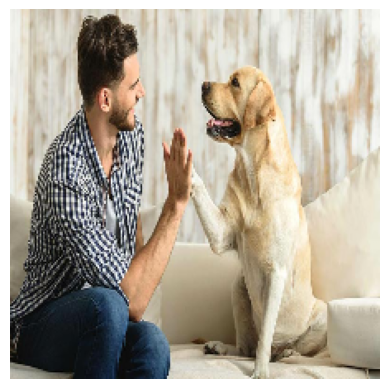

In [ ]:
image2=load_and_prep_image("/content/drive/MyDrive/Yellow-Lab-High-Five.jpg")

#Usinf treanfer learning

In [ ]:
import tensorflow_hub as hub
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

##getting the links of the of the prertrained models resnet and efficient

In [ ]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"


##Resnet model

In [ ]:
feature_extraction_layer = hub.KerasLayer(resnet_url,
                                            trainable=False,
                                            name='feature_extraction_layer',
                                            input_shape=(224,224,3))

model_2 = Sequential([
    feature_extraction_layer,
    layers.Dense(9, activation='softmax',name='output_layer')
    ])

In [ ]:
model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
resnet_history= model_2.fit(train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                 )


Epoch 1/5
271/271 [==============================] - 3255s 12s/step - loss: 0.2179 - accuracy: 0.9380 - val_loss: 0.0758 - val_accuracy: 0.9791
Epoch 2/5
271/271 [==============================] - 79s 292ms/step - loss: 0.0376 - accuracy: 0.9904 - val_loss: 0.0656 - val_accuracy: 0.9833
Epoch 3/5
271/271 [==============================] - 79s 293ms/step - loss: 0.0179 - accuracy: 0.9964 - val_loss: 0.0588 - val_accuracy: 0.9812
Epoch 4/5
271/271 [==============================] - 79s 292ms/step - loss: 0.0102 - accuracy: 0.9993 - val_loss: 0.0557 - val_accuracy: 0.9843
Epoch 5/5
271/271 [==============================] - 78s 290ms/step - loss: 0.0068 - accuracy: 0.9995 - val_loss: 0.0554 - val_accuracy: 0.9843


In [ ]:
model_2.save("drive/MyDrive/ewsnet_model")

##Efficientnet model

In [ ]:
feature_extraction_layer_2 = hub.KerasLayer(efficientnet_url,
                                            trainable=False,
                                            name='feature_ectraction_layer',
                                            input_shape=(224,224,3))

model_3 = Sequential([
    feature_extraction_layer_2,
    layers.Dense(9, activation='softmax',name='output_layer')
    ])

In [ ]:
model_3.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
efficientnet1_history = model_3.fit(train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                 )


Epoch 1/5
271/271 [==============================] - 91s 296ms/step - loss: 0.3742 - accuracy: 0.9265 - val_loss: 0.1216 - val_accuracy: 0.9822
Epoch 2/5
271/271 [==============================] - 85s 311ms/step - loss: 0.0831 - accuracy: 0.9870 - val_loss: 0.0792 - val_accuracy: 0.9854
Epoch 3/5
271/271 [==============================] - 79s 290ms/step - loss: 0.0495 - accuracy: 0.9921 - val_loss: 0.0613 - val_accuracy: 0.9864
Epoch 4/5
271/271 [==============================] - 83s 305ms/step - loss: 0.0339 - accuracy: 0.9947 - val_loss: 0.0545 - val_accuracy: 0.9896
Epoch 5/5
271/271 [==============================] - 81s 298ms/step - loss: 0.0247 - accuracy: 0.9958 - val_loss: 0.0506 - val_accuracy: 0.9896


In [ ]:
train_dir = "drive/MyDrive/project_Data/train/"
test_dir = "drive/MyDrive/project_Data/test/"

IMG_SIZE = (224, 224)

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 8643 files belonging to 9 classes.
Found 957 files belonging to 9 classes.


In [ ]:
from tensorflow import keras


##Performing data augmentation

In [ ]:
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),

], name ="data_augmentation")


In [ ]:
input_shape = (224, 224, 3)


base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False


inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_3 = tf.keras.Model(inputs, outputs)

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model_3.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [ ]:
initial_epochs = 5
fine_tuning = model_3.fit(train_data,
                          epochs=initial_epochs,
                          validation_data=test_data)


Epoch 1/5
271/271 [==============================] - 38s 136ms/step - loss: 1983.0675 - accuracy: 0.1754 - val_loss: 1379.9773 - val_accuracy: 0.1870
Epoch 2/5
271/271 [==============================] - 38s 137ms/step - loss: 1002.2071 - accuracy: 0.2239 - val_loss: 1121.7571 - val_accuracy: 0.1891
Epoch 3/5
271/271 [==============================] - 36s 129ms/step - loss: 846.6382 - accuracy: 0.2356 - val_loss: 1244.1394 - val_accuracy: 0.1693
Epoch 4/5
271/271 [==============================] - 37s 133ms/step - loss: 681.8328 - accuracy: 0.2468 - val_loss: 805.4155 - val_accuracy: 0.2299
Epoch 5/5
271/271 [==============================] - 35s 128ms/step - loss: 613.7328 - accuracy: 0.2619 - val_loss: 896.9580 - val_accuracy: 0.1944


###Unfreezing last 10 layer making them trainable (efficientnet)

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [ ]:
fine_tune_epochs = initial_epochs + 5

history_fine_tuing = model_3.fit(train_data,
                                  epochs=fine_tune_epochs,
                                  validation_data=test_data,
                                  initial_epoch=fine_tuning.epoch[-1])

Epoch 5/10
271/271 [==============================] - 44s 144ms/step - loss: 412.0673 - accuracy: 0.3033 - val_loss: 654.5916 - val_accuracy: 0.2372
Epoch 6/10
271/271 [==============================] - 37s 134ms/step - loss: 368.6742 - accuracy: 0.3078 - val_loss: 628.2250 - val_accuracy: 0.2351
Epoch 7/10
271/271 [==============================] - 37s 132ms/step - loss: 350.3203 - accuracy: 0.3119 - val_loss: 613.2042 - val_accuracy: 0.2288
Epoch 8/10
271/271 [==============================] - 37s 134ms/step - loss: 341.8740 - accuracy: 0.3108 - val_loss: 618.0841 - val_accuracy: 0.2257
Epoch 9/10
271/271 [==============================] - 35s 128ms/step - loss: 333.2260 - accuracy: 0.3130 - val_loss: 592.3358 - val_accuracy: 0.2309
Epoch 10/10
271/271 [==============================] - 37s 132ms/step - loss: 323.7339 - accuracy: 0.3159 - val_loss: 595.8475 - val_accuracy: 0.2351


In [ ]:
loaded_efficientnet = tf.keras.models.load_model("/content/drive/MyDrive/efficientnet_model")


In [ ]:
loaded_efficientnet.trainable = True

for layer in loaded_efficientnet.layers[:-10]:
  layer.trainable = False

loaded_efficientnet.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [ ]:
fine_tune_epochs = 10

history_fine_tuing_efficientnet = model_3.fit(train_data,
                                  epochs=fine_tune_epochs,
                                  validation_data=test_data,
                                  initial_epoch=fine_tuning.epoch[-1])

Epoch 5/10
271/271 [==============================] - 41s 145ms/step - loss: 312.4659 - accuracy: 0.3210 - val_loss: 573.3062 - val_accuracy: 0.2247
Epoch 6/10
271/271 [==============================] - 36s 128ms/step - loss: 307.9099 - accuracy: 0.3203 - val_loss: 572.0167 - val_accuracy: 0.2288
Epoch 7/10
271/271 [==============================] - 37s 133ms/step - loss: 301.7428 - accuracy: 0.3234 - val_loss: 558.5449 - val_accuracy: 0.2268
Epoch 8/10
271/271 [==============================] - 38s 137ms/step - loss: 295.8162 - accuracy: 0.3200 - val_loss: 566.9188 - val_accuracy: 0.2288
Epoch 9/10
271/271 [==============================] - 36s 129ms/step - loss: 292.0008 - accuracy: 0.3227 - val_loss: 571.4831 - val_accuracy: 0.2247
Epoch 10/10
271/271 [==============================] - 37s 132ms/step - loss: 287.8932 - accuracy: 0.3221 - val_loss: 544.8053 - val_accuracy: 0.2362
